In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv('W100MTimes.txt', delimiter = '\t')
df.columns = ['year','time']

In [117]:
def calculate_J(train, test):  
    X_train = train.iloc[ : , :-1].values 
    y_train = train.iloc[ : , -1:].values
    
    print(X_train.shape)
    print(y_train.shape)
    
    val_1 = np.ones(shape = y_train.shape) 
    X_train = np.concatenate((val_1, X_train), 1) #Generating a Design Matrix

    A = np.linalg.pinv(np.dot(X_train.T, X_train))
    B = np.dot(X_train.T, y_train)
    
    w = np.dot(A, B) #Calculating weights using Training Data
    A = np.dot(X_train, w) - y_train
    train_J = (1/len(train))*np.dot(A.T, A)

    X_test = test.iloc[:, :-1].values
    y_test = test.iloc[ : , -1:].values

    val_1 = np.ones(shape = y_test.shape)
    X_test = np.concatenate((val_1, X_test), 1) #Generating a Design Matrix
    
    y_pred = np.dot(X_test, w) #Obtaining the prediction values
    A = np.dot(X_test, w) - y_test
    test_J = (1/len(test))*np.dot(A.T, A)

    return train_J[0][0], test_J[0][0]

In [100]:
train_result = pd.DataFrame(columns = [1, 2, 3])
test_result = pd.DataFrame(columns = [1, 2, 3])
full_result = pd.DataFrame(columns = [1, 2, 3])

In [101]:
end = 0
k = 1
while end < len(df):
    start = end
    end += 4
    test = df.iloc[start:end, : ]
    train_1 = df.iloc[:start, : ]
    train_2 = df.iloc[end:, : ]
    train = pd.DataFrame()
    train = train.append(train_1)
    train = train.append(train_2)
    train_J,test_J = calculate_J(train,test) 
    train_result.loc['train_'+ str(k), 1] = train_J
    test_result.loc['test_'+ str(k), 1] = test_J
    
    full_result.loc['train_'+ str(k), 1] = train_J
    full_result.loc['test_'+ str(k), 1] = test_J
    
    for i in range(2,4):    
        temp_train = train.iloc[:,0:1] ** i
        temp_test = test.iloc[:,0:1] ** i
        
        train.insert(i-1, i, temp_train)
        test.insert(i-1, i, temp_test)
        
        train_J, test_J = calculate_J(train, test)
        train_result.loc['train_'+ str(k), i] = train_J
        test_result.loc['test_'+ str(k), i] = test_J
        
        full_result.loc['train_'+ str(k), i] = train_J
        full_result.loc['test_'+ str(k), i] = test_J
    k+=1

In [109]:
print(train_result.mean())

1    0.042296
2    0.033409
3    0.037913
dtype: float64

In [123]:
print(test_result.mean())

1    0.102790
2    0.044385
3    1.088312
dtype: float64


In [105]:
x = [1,2,3]
y_train = train_result.mean()
y_test = test_result.mean()

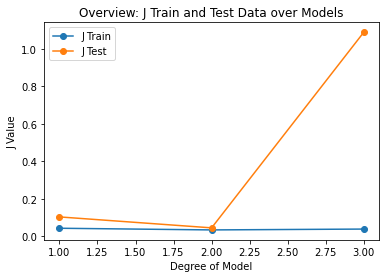

In [106]:
#fig = plt.figure(figsize=(3, 3))
fig, ax = plt.subplots()
ax.plot(x, y_train,  linestyle='-', marker='o', label='J Train')
ax.plot(x, y_test,  linestyle='-', marker='o',  label='J Test')

ax.set_title("Overview: J Train and Test Data over Models")
ax.set_xlabel('Degree of Model')
ax.set_ylabel('J Value')
ax.legend()
plt.show()

In [34]:
full_result.to_excel('Result.xlsx')

In [113]:
def calculate_weight(train):  
    X_train = train.iloc[ : , :-1].values 
    y_train = train.iloc[ : , -1:].values

    val_1 = np.ones(shape = y_train.shape) 
    X_train = np.concatenate((val_1, X_train), 1) #Generating a Design Matrix

    A = np.linalg.pinv(np.dot(X_train.T, X_train))
    B = np.dot(X_train.T, y_train)
    
    w = np.dot(A, B) #Calculating weights using Training Data
    return w

In [133]:
temp = df.iloc[:,0:1] ** 2
df.insert(1, 'sq', temp)

In [135]:
print(calculate_weight(df))

[[ 1.30696152e+01]
 [-4.09219729e-02]
 [ 1.87027905e-04]]


In [120]:
full_result.to_excel('Final Result.xlsx')